In [50]:
from skimage import segmentation, color, io
from skimage.future import graph
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
from sklearn.cluster import spectral_clustering
from skimage.io import imread, imsave
import numpy as np
from skimage.transform import resize
from PIL import Image

In [7]:
img = imread("testpic.jpg")
img = Image.open("paddington.png")

CPU times: user 2min 45s, sys: 7.09 s, total: 2min 52s
Wall time: 4min 9s


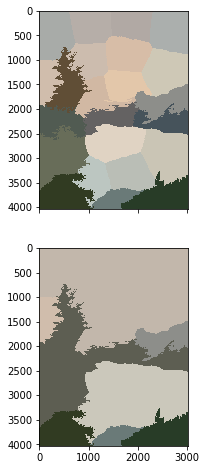

In [8]:
%%time
labels1 = segmentation.slic(img, compactness=30, n_segments=25)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

In [94]:
# get image 
pic = Image.open("yosemite.jpg")
img = np.array(pic)
imy = img.shape[0]
imx = img.shape[1]

# get clusters 
clusters = segmentation.slic(img, compactness=10, n_segments=100)

# for each cluster get the smallest bounding rectangle
for cluster in np.unique(clusters):
    indices = np.where(clusters == cluster)
    miny = np.min(indices[0])
    maxy = np.max(indices[0])
    minx = np.min(indices[1])
    maxx = np.max(indices[1])
    
    # rescale each rectangle to pixelize and then scale back up to reinsert
    # scale down
    oldsize = (int(maxy-miny), int(maxx-minx))
    factor = min(maxy-miny,maxx-minx)/10
    t = (np.ceil((maxy-miny)/factor), np.ceil((maxx-minx)/factor))
    newsize = (int(t[0]), int(t[1]))
    newim = Image.fromarray(img[miny:maxy, minx:maxx])
    
    # Resize smoothly down 
    imgSmall = newim.resize(newsize[::-1],resample=Image.BILINEAR)

    # Scale back up using NEAREST to original size
    result = imgSmall.resize(oldsize[::-1],Image.NEAREST)
    
    # scale up 
    # dummy larger picture 
    dummy = np.zeros((imy,imx,3))
    dummy[miny:maxy, minx:maxx] = np.array(result)
    img[indices[0],indices[1]] = dummy[indices[0],indices[1]]
    
newimage = Image.fromarray(img)
newimage.save("yosemite_outpic.jpg")

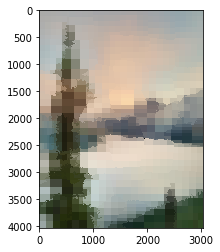

In [72]:
plt.imshow(newimage)

In [28]:
clusters[indices[0],indices[1]]

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
img.shape[1]

3024

In [52]:
test = Image.open("testpic.jpg")

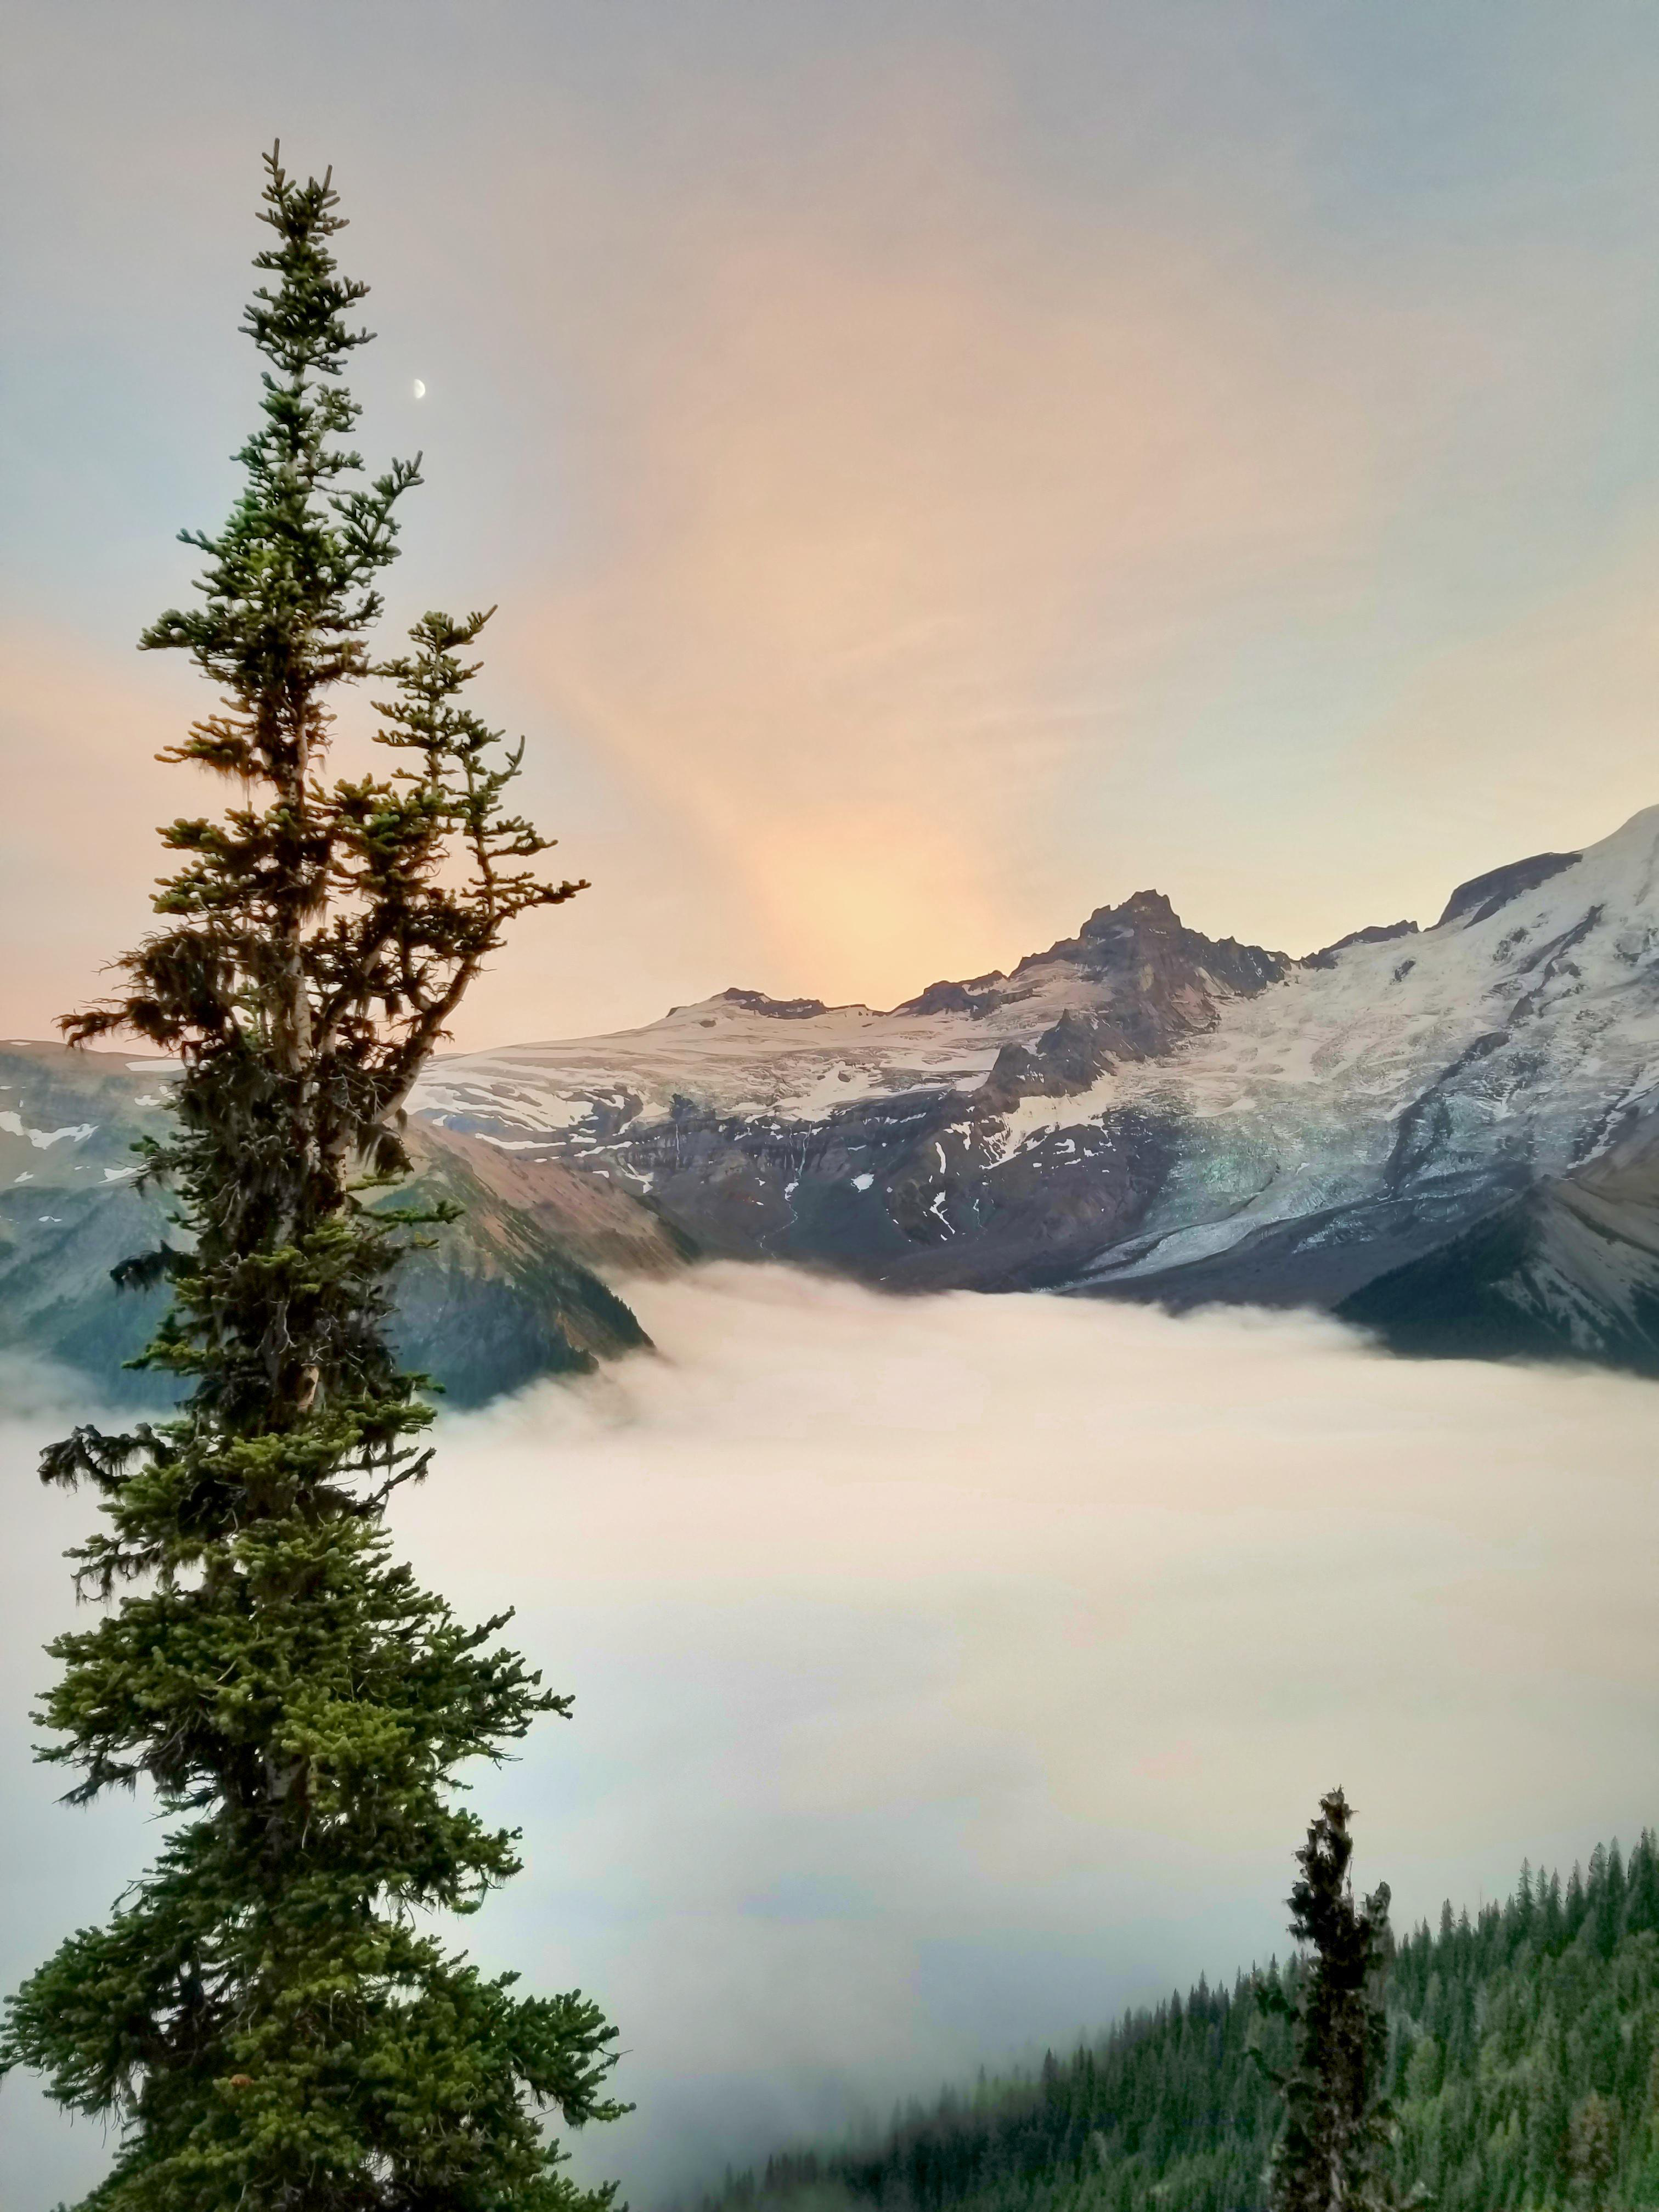